# Customer Churn Recommendation System

#### Table of Content

#### Member List
1. Huỳnh Nguyên Phúc - K21, Computer Science, Ho Chi Minh City University of Technology  (Leader)
2. Đỗ Nguyễn An Huy - K21, Computer Science, Ho Chi Minh City University of Technology
3. Phạm Đức Minh - K21, Computer Engineering, Ho Chi Minh City University of Technology
4. Nguyễn Xuân Thọ - K21, Computer Science, Ho Chi Minh City University of Technology
5. Huỳnh Thái Học - K21, Computer Science, Ho Chi Minh City University of Technology

## 1. Datasets Description

### 1.1. Datasets source

* The datasets are sample datasets generated by IBM, and are a part of The Base Samples in IBM's Cognos Analytics environment.
* The Telco customer churn datasets contain information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. 
* Source link for dataset: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### 1.2. Datasets description
* Number of datasets: 5 with 2 types:
    * Type 1 "Customer status": 4 datasets 'Telco_customer_churn_status.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn_demographics.xlsx'.
    * Type 2 "Population": Dataset 'Telco_customer_churn_population.xlsx'
* Dataset characteristics: Multivariate
* Attribute characteristics: Object, Integer, Float
* Area: Telecom
* Number of attribute:
    * Before merging:
        * Status: 11
        * Services: 30
        * Location: 9
        * Demographics: 9
        * Population: 3
    * After merging: 54
* Number of instances:
    * Type 1: 7043
    * Type 2: 1671

## 2. Import essential packages for working with datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import keras
import tensorflow as tf

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

## 3. Import dataset to working environment

### 3.1. Import dataset

In [2]:
df_status = pd.read_excel('./dataset/Telco_customer_churn_status.xlsx')
df_services = pd.read_excel('./dataset/Telco_customer_churn_services.xlsx')
df_population = pd.read_excel('./dataset/Telco_customer_churn_population.xlsx')
df_population = df_population.drop("ID", axis = 1)
df_location = pd.read_excel('./dataset/Telco_customer_churn_location.xlsx')
df_demographics = pd.read_excel('./dataset/Telco_customer_churn_demographics.xlsx')

In [3]:
df = pd.merge(df_demographics, df_location, on = ["Customer ID", "Count"])
df = pd.merge(df, df_population, on = "Zip Code")
df = pd.merge(df, df_services, on = ["Customer ID", "Count"])
df = pd.merge(df, df_status, on = ["Customer ID", "Count"])

In [5]:
df.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Country', 'State',
       'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Population',
       'Quarter_x', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Satisfaction Score', 'Customer Status',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
      

We can see 'Quarter_x', 'Quarter_y' are equivalent, so we remove one of it and rename the other. 

In [6]:
df.rename(columns = {'Quarter_x':'Quarter'}, inplace = True)
df = df.drop(["Quarter_y"], axis = 1)

In [7]:
# Saving a back-up for this dataset by using deep copy
df_temp = copy.deepcopy(df)
df_temp.to_csv('./dataset/back-up.csv')

### 3.2. Some characteristics about dataset

In [8]:
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,United States,...,3063.60,8080.25,3,Stayed,No,0,42,4658,NaN,NaN
2,5043-TRZWM,1,Female,32,No,No,No,No,0,United States,...,7.11,82.66,5,Joined,No,0,34,3503,NaN,NaN
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,United States,...,0.00,3708.40,3,Stayed,No,0,46,5748,NaN,NaN
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,United States,...,255.43,888.88,3,Stayed,No,0,38,5545,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Country                            7043 non-null   object 
 10  State                              7043 non-null   object 
 11  City                               7043 non-null   objec

In [10]:
df.describe()

,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,...,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,0.0,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,...,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,1.0,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,1.0,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,...,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,1.0,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,...,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,1.0,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,...,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,1.0,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,...,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000


In [11]:
df.nunique()

Customer ID                          7043
Count                                   1
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Lat Long                             1679
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges 

## 4. Data preprocessing

### 4.1 Duplicate values hadling

In [12]:
df.duplicated().sum()

0

There is no duplicate values, so we skip this progress.

### 4.2. Missing value handling

In [13]:
df.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges 

The dataset contains no missing values (Missing values in Churn Category or Churn Reason means the customers do not churn)

In [14]:
df['Churn Reason'].fillna("None", inplace = True)
df['Churn Category'].fillna("None", inplace = True)

### 4.3. Feature Selection

* Drop some constant-value features

In [15]:
df.drop(['Count', 'Country', 'State', 'Quarter'], axis = 1, inplace = True)

In [16]:
# Saving for using in the future
dataset_info = {'Country': 'United States', 'State': 'California', 'Quarter': 'Q3'}

* Drop some irrelevant features

In [17]:
df.drop(["City", "Zip Code", "Lat Long", "Latitude", "Longitude"], axis = 1, inplace = True)


In [18]:
id = df["Customer ID"]
df.drop("Customer ID", axis = 1, inplace = True)

* Drop some equivalent features

<Axes: xlabel='Churn Value', ylabel='Churn Label'>

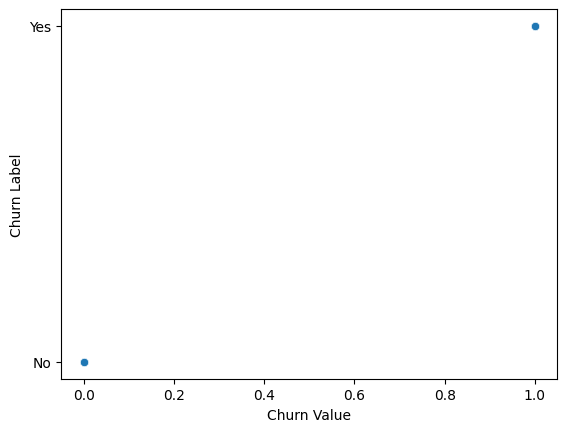

In [19]:
sns.scatterplot(data = df, x = "Churn Value", y = "Churn Label")

We can see **Churn Value** and **Churn Label** are equivalent, so we drop one of them. In this case, we choose dropping **Churn Value**.

In [20]:
df.drop(['Churn Label'], axis = 1, inplace = True)

<Axes: xlabel='Number of Referrals', ylabel='Referred a Friend'>

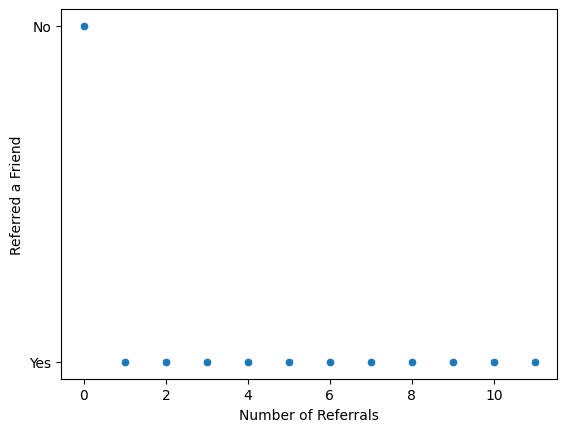

In [21]:
sns.scatterplot(data = df, x = "Number of Referrals", y = "Referred a Friend")

With "Number of Referrals", it's safe to drop "Referred a Friend".

In [22]:
df.drop(['Referred a Friend'], axis = 1, inplace = True)

We can see the relationship of two features **Under 30** and **Senior Citizen** with **Age** in two plots behind.

<Axes: title={'center': 'Senior Citizen vs Age'}, xlabel='Age', ylabel='Count'>

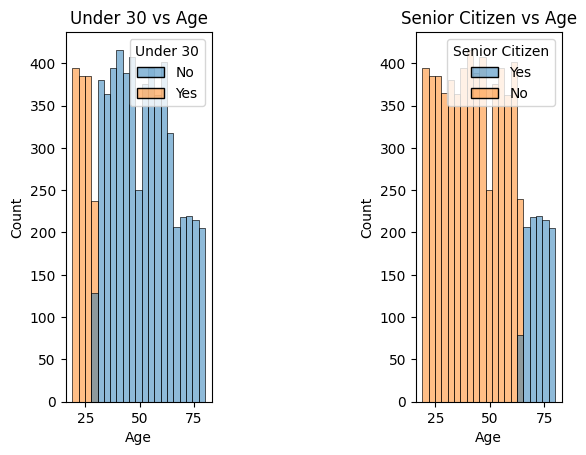

In [23]:
plt.subplot2grid((2,3), (0,0), rowspan = 2)
plt.title("Under 30 vs Age")
sns.histplot(data = df, x = "Age", hue = "Under 30")
plt.subplot2grid((2,3), (0,2), rowspan = 2)
plt.title("Senior Citizen vs Age")
sns.histplot(data = df, x = "Age", hue = "Senior Citizen")

To customize the dataset, it's safe to drop two features above.

In [24]:
df.drop(['Under 30', 'Senior Citizen'], axis = 1, inplace = True)

* Drop some columns which affect predict model result

<Axes: xlabel='Churn Value', ylabel='Churn Category'>

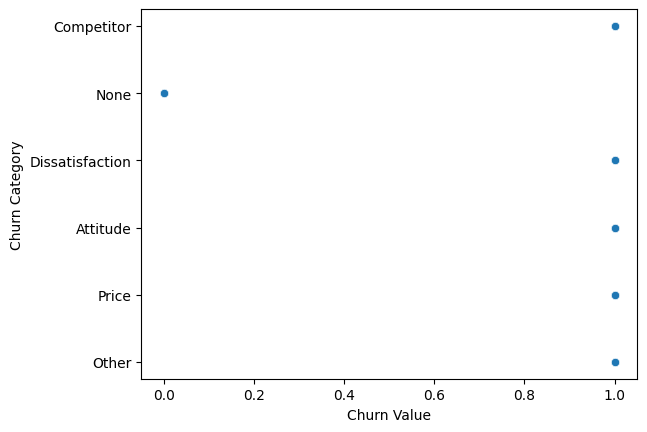

In [25]:
sns.scatterplot(data = df, x = "Churn Value", y = "Churn Category")

<Axes: xlabel='Churn Value', ylabel='Churn Reason'>

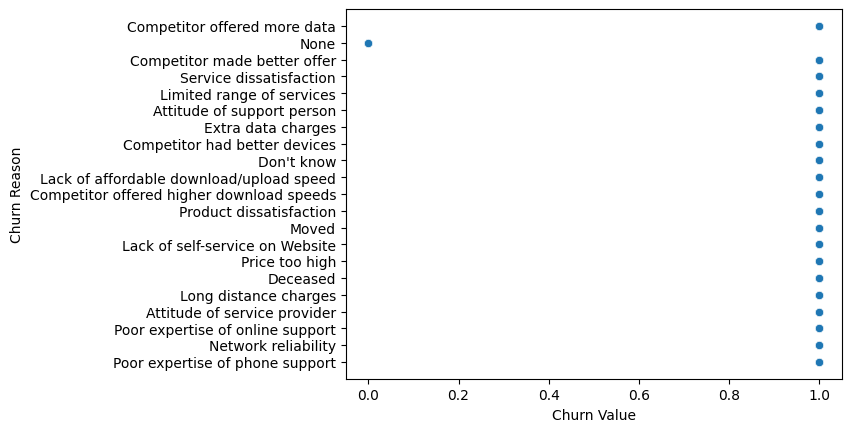

In [26]:
sns.scatterplot(data = df, x = "Churn Value", y = "Churn Reason")

<Axes: xlabel='Churn Value', ylabel='Customer Status'>

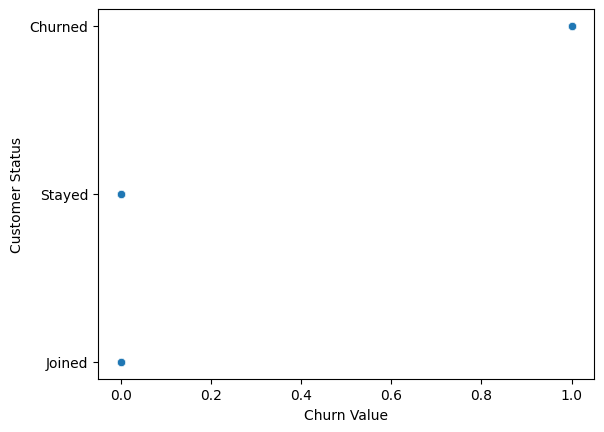

In [27]:
sns.scatterplot(data = df, x = "Churn Value", y = "Customer Status")

In [28]:
df.drop(['Customer Status', 'Churn Category', 'Churn Reason'], axis = 1, inplace = True)

> In the end of this process, we get the dataset's shape

In [29]:
df.shape

(7043, 36)

### 4.4. Feature Engineering

#### 4.4.1. Dropping some uninformative columns

We can apparently see that "Total Long Distance Charges" = "Tenure in Months" * "Avg Monthly Long Distance Charges". Let's take a look with it

In [30]:
((df["Avg Monthly Long Distance Charges"] * df["Tenure in Months"] - df["Total Long Distance Charges"]).abs() < 1e-7).value_counts()

True    7043
dtype: int64

In [31]:
df.drop("Total Long Distance Charges", axis = 1, inplace = True)

<Axes: xlabel='Total Refunds', ylabel='Count'>

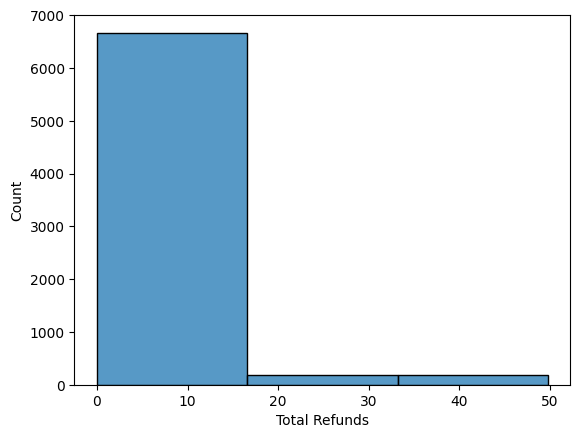

In [32]:
sns.histplot(df["Total Refunds"], bins = 3)

There's not much information in "Total Refunds" feature.

In [33]:
(df["Total Refunds"] > 0).value_counts()

False    6518
True      525
Name: Total Refunds, dtype: int64

In [34]:
df["Refunded"] = df["Total Refunds"] > 0
df.drop("Total Refunds", axis = 1, inplace = True)

There's not much information in "Total Extra Data Charges" feature too.

<Axes: xlabel='Total Extra Data Charges', ylabel='Count'>

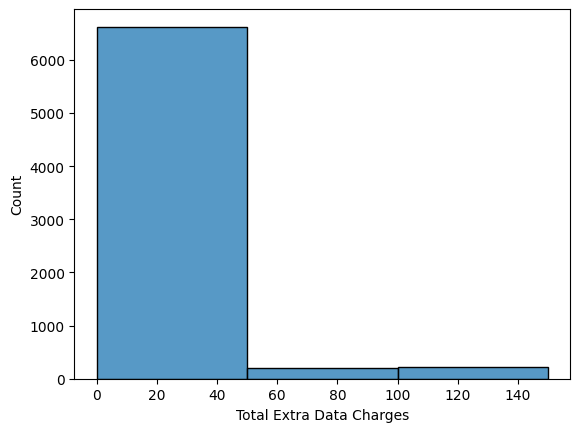

In [35]:
sns.histplot(df["Total Extra Data Charges"], bins = 3)

In [36]:
(df["Total Extra Data Charges"] > 0).value_counts()

False    6315
True      728
Name: Total Extra Data Charges, dtype: int64

In [37]:
df["Has Extra Data Charges"] = df["Total Extra Data Charges"] > 0
df.drop("Total Extra Data Charges", axis = 1, inplace = True)

#### 4.4.2. Feature Encoding

In [38]:
df.dtypes

Gender                                object
Age                                    int64
Married                               object
Dependents                            object
Number of Dependents                   int64
Population                             int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited 

We can see there are still columns with value type of "object", we want to transfer them to integer type so that our models can work with the data.

In [39]:
mapping = {'Male': 1, 'Female': 0,
           'Yes': 1, 'No': 0,
           True: 1, False: 0,
           'None': 0,
           'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5,
           'Month-to-Month': 3, 'One Year': 1, 'Two Year': 2,
           'DSL': 1, 'Cable': 2, 'Fiber Optic': 3,
           'Mailed Check': 1, 'Credit Card': 2, 'Bank Withdrawal': 3}

In [40]:
for i in df.columns:
  if df[i].dtype == "object" or df[i].dtype == "bool":
    df[i] = df[i].apply(lambda x: mapping[x])

In [41]:
df.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Dependents                             int64
Number of Dependents                   int64
Population                             int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                          int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited 

#### 4.4.3. Normalization

In [42]:
def convert(a):
  return (a-a.min())/(a.max()-a.min())

In [43]:
df = df.apply(lambda x: convert(x))

## 5. Customer Churn Prediction Model

### Splitting dataset

In [44]:
# Function to split data.
from sklearn.model_selection import train_test_split
y = df['Churn Value']
x = df.drop(['Churn Value'], axis = 1)

# Split datasets into 2 parts with ratio 7:3 and random state is 24
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=24)

### 5.1. Basic Classification

In [ ]:
# Functions to evaluate models
from sklearn.metrics import classification_report
import scikitplot as skplt

##### 5.1.a. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Report of Logistic Regression
print(f'Train Score:  {round(LR.score(x_train, y_train), 3)},\tTest Score:  {round(LR.score(x_test, y_test), 3)}\n')
print('Classification Report:')
print(classification_report(y_test, LR.predict(x_test)))

Train Score:  0.98,	Test Score:  0.978

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1549
         1.0       0.97      0.95      0.96       564

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113



<AxesSubplot:title={'center':'Confusion Matrix of Logistic Regression'}, xlabel='Predicted label', ylabel='True label'>

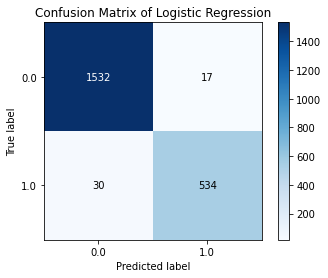

In [ ]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    LR.predict(x_test),
    title = 'Confusion Matrix of Logistic Regression',
)

<AxesSubplot:title={'center':'ROC Curve of Logistic Regression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

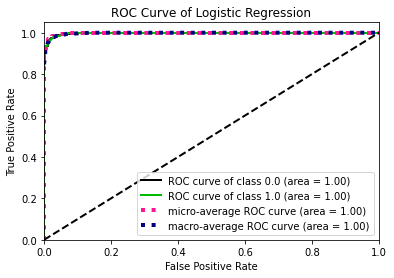

In [ ]:
# ROC Curve
skplt.metrics.plot_roc_curve(
    y_test,
    LR.predict_proba(x_test),
    title='ROC Curve of Logistic Regression',
)

##### 5.1.b. Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Report of Decision Tree
print(f'Train Score:  {round(DT.score(x_train, y_train), 3)},\tTest Score:  {round(DT.score(x_test, y_test), 3)}\n')
print('Classification Report:')
print(classification_report(y_test, DT.predict(x_test)))

Train Score:  0.973,	Test Score:  0.971

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1549
         1.0       1.00      0.89      0.94       564

    accuracy                           0.97      2113
   macro avg       0.98      0.95      0.96      2113
weighted avg       0.97      0.97      0.97      2113



<AxesSubplot:title={'center':'Confusion Matrix of Decision Tree'}, xlabel='Predicted label', ylabel='True label'>

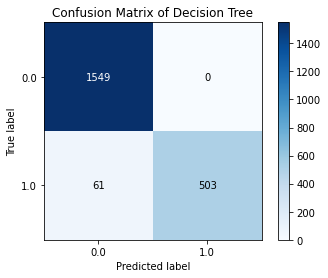

In [ ]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    DT.predict(x_test),
    title = 'Confusion Matrix of Decision Tree',
)

<AxesSubplot:title={'center':'ROC Curve of Decision Tree'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

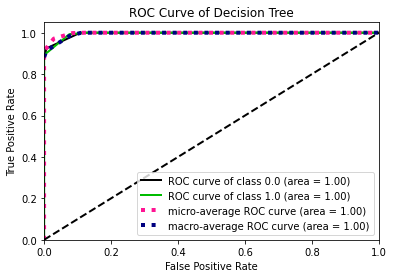

In [ ]:
# ROC Curve
skplt.metrics.plot_roc_curve(
    y_test,
    DT.predict_proba(x_test),
    title='ROC Curve of Decision Tree',
)

##### 5.1.c. Naive Bayes

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Report of Naive Bayes
print(f'Train Score:  {round(NB.score(x_train, y_train), 3)},\tTest Score:  {round(NB.score(x_test, y_test), 3)}\n')
print('Classification Report:')
print(classification_report(y_test, NB.predict(x_test)))

Train Score:  0.923,	Test Score:  0.925

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1549
         1.0       0.84      0.89      0.86       564

    accuracy                           0.92      2113
   macro avg       0.90      0.91      0.91      2113
weighted avg       0.93      0.92      0.93      2113



<AxesSubplot:title={'center':'Confusion Matrix of Naive Bayes'}, xlabel='Predicted label', ylabel='True label'>

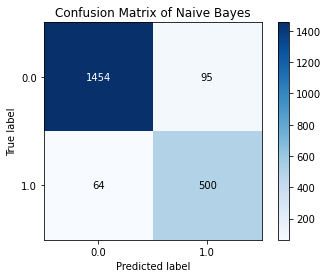

In [ ]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    NB.predict(x_test),
    title = 'Confusion Matrix of Naive Bayes',
)

<AxesSubplot:title={'center':'ROC Curve of Naive Bayes'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

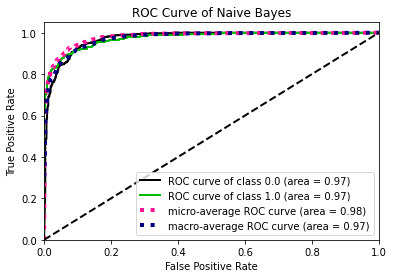

In [ ]:
# ROC Curve
skplt.metrics.plot_roc_curve(
    y_test,
    NB.predict_proba(x_test),
    title='ROC Curve of Naive Bayes',
)

##### 5.1.d. Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=5)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
# Report of Random Forest
print(f'Train Score:  {round(RF.score(x_train, y_train), 3)},\tTest Score:  {round(RF.score(x_test, y_test), 3)}\n')
print('Classification Report:')
print(classification_report(y_test, RF.predict(x_test)))

Train Score:  0.977,	Test Score:  0.974

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1549
         1.0       1.00      0.90      0.95       564

    accuracy                           0.97      2113
   macro avg       0.98      0.95      0.97      2113
weighted avg       0.97      0.97      0.97      2113



<AxesSubplot:title={'center':'Confusion Matrix of Random Forest'}, xlabel='Predicted label', ylabel='True label'>

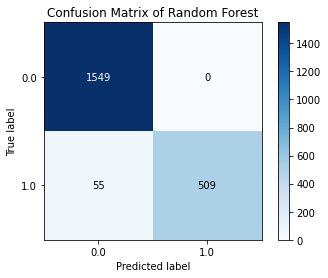

In [ ]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    RF.predict(x_test),
    title = 'Confusion Matrix of Random Forest',
)

<AxesSubplot:title={'center':'ROC Curve of Random Forest'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

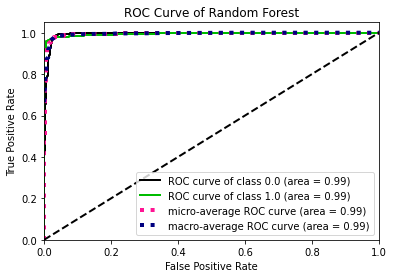

In [ ]:
# ROC Curve
skplt.metrics.plot_roc_curve(
    y_test,
    RF.predict_proba(x_test),
    title='ROC Curve of Random Forest',
)

##### 5.1.e. Support Vector Machines

In [ ]:
# Support Vector Machines.
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
SVM = CalibratedClassifierCV(LinearSVC(C=0.1, max_iter=10))
SVM.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, max_iter=10))

In [ ]:
# Report of Support Vector Machines
print(f'Train Score:  {round(SVM.score(x_train, y_train), 3)},\tTest Score:  {round(SVM.score(x_test, y_test), 3)}\n')
print('Classification Report:')
print(classification_report(y_test, SVM.predict(x_test)))

Train Score:  0.981,	Test Score:  0.978

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1549
         1.0       0.97      0.95      0.96       564

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113



<AxesSubplot:title={'center':'Confusion Matrix of Support Vector Machines'}, xlabel='Predicted label', ylabel='True label'>

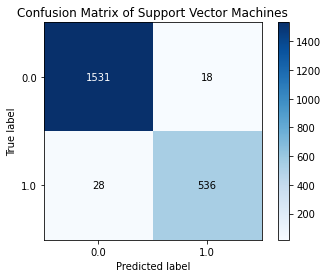

In [ ]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(
    y_test,
    SVM.predict(x_test),
    title = 'Confusion Matrix of Support Vector Machines',
)

<AxesSubplot:title={'center':'ROC Curve of Support Vector Machines'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

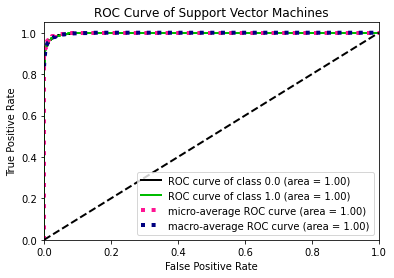

In [ ]:
# ROC Curve
skplt.metrics.plot_roc_curve(
    y_test,
    SVM.predict_proba(x_test),
    title='ROC Curve of Support Vector Machines',
)

### 5.2. Multi-Layer Perceptron

In [104]:
import tensorflow as tf
from tf.keras.layers import Dense, Input, Dropout
from tf.keras.optimizers.schedules import Inverse
from tf.keras.optimizers import Adam
from tf.keras.callbacks import EarlyStopping
from tf.keras.models import Sequential
from tf.keras.metrics import Recall, Precision
from tf.keras.constraints import max_norm


from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_15540\917905293.py", line 2, in <module>
    from tf.keras.layers import Dense, Input, Dropout
ModuleNotFoundError: No module named 'tf'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming

In [ ]:
model = Sequential()
model.add(Input(shape = x.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = "relu", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = "relu", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = "sigmoid", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))

lr_schedule = InverseTimeDecay(0.1, decay_steps = 20, decay_rate = 0.3)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr_schedule), metrics = ["accuracy", Recall(), Precision()])
model.summary()

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 32, callbacks = [EarlyStopping(monitor="val accuracy", patience = 70, restore_best_weights = True)])

The threshold is taken to be 0.3.

In [ ]:
print(classification_report(y_test, model.predict(x_test) >= 0.3))

In [ ]:
print(accuracy_score(y_test, model.predict(x_test) >= 0.3))

In [ ]:
saved_model = model

In [ ]:
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

In [ ]:
plt.plot(history.history["recall"], label = "Train")
plt.plot(history.history["val_recall"], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.title("Recall vs Epochs")
plt.legend()

In [ ]:
plt.plot(history.history["precision"], label = "Train")
plt.plot(history.history["val_precision"], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.title("Precision vs Epochs")
plt.legend()

#### Cross validation

In [ ]:
model = Sequential()
model.add(Input(shape = x.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = "relu", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = "relu", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = "sigmoid", kernel_regularizer = "l2", kernel_constraint = max_norm(5.0)))

lr_schedule = InverseTimeDecay(0.1, decay_steps = 20, decay_rate = 0.3)
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr_schedule), metrics = ["accuracy", Recall(), Precision()])
model.summary()

In [ ]:
for train_index, test_index in StratifiedKFold().split(x, y):
    print("New iteration:")
    model.fit(x.iloc[train_index], y.iloc[train_index], verbose = False, epochs = 200, batch_size = 32, callbacks = [EarlyStopping(monitor="val accuracy", patience = 70, restore_best_weights = True)])
    y_pred = model.predict(x.iloc[test_index]) >= 0.3
    print(f"   Accuracy: {accuracy_score(y.iloc[test_index], y_pred)}")
    print(f"   Classification metrics:\n{classification_report(y.iloc[test_index], y_pred)}")

In [ ]:
tf.saved_model.save(saved_model, "churn_prediction")

## 6. Customer Churn Recommendation System

### 6.1. Building utility matrix

In [51]:
df.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Population', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Revenue',
       'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV', 'Refunded',
       'Has Extra Data Charges'],
      dtype='object')

In [66]:
service = ['Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']

In [72]:
utility_matrix = df_temp[['Internet Type']]
utility_matrix = pd.get_dummies(utility_matrix)
utility_matrix.drop('Internet Type_None', axis = 1, inplace = True)

In [73]:
utility_matrix = pd.concat([utility_matrix, df[service]], axis = 1)

In [74]:
utility_matrix.head(10)

,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
7,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
8,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [75]:
utility_matrix = utility_matrix.replace(0, np.NaN)

In [76]:
utility_matrix.head(10)

,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0
4,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0
5,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0
7,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
8,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0


### 6.2. Building Customer Churn Recommendation System based on Item-based Collaborative Filtering

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
class CollaborativeFiltering(object):
    def __init__(self, data, user_list, k, dist_func = cosine_similarity):
      self._data = data.copy()
      # self._data = self._data.apply(lambda x: x - x.mean(), axis = 1) # Normalize
      self._np_data = np.array(copy.deepcopy(self._data).fillna(0))
      self._k = k # k most similarity users
      self.dist_func = dist_func # Function using for calculating distance between two users
      # Number of users and items.
      self._user = user_list
      self._item = list(self._data.columns).copy()
      self._data.columns = range(0, self._data.shape[1])
      self._n_users = self._data.shape[0]
      self._n_items = self._data.shape[1]
      self.sim_disc = pd.DataFrame(self.dist_func(self._np_data, self._np_data)) # Similarity distance

    def insert(self, new_data):
      new_data = new_data.apply(lambda x: x - x.mean(), axis = 1)
      np_new_data = np.array(copy.deepcopy(new_data).fillna(0))
      self._data = pd.concat([self._data, new_data], axis = 0, ignore_index = True)
      self._np_data = np.concatenate([self._np_data, np_new_data], axis = 0)
      self._n_users = self._data.shape[0]
      new_data_disc = pd.DataFrame(self.dist_func(self.np_new_data, self.np_new_data))
      temp = pd.DataFrame(self.dist_func(self.np_new_data, self.np_new_data))
      self.sim_disc = pd.concat([pd.concat([self.sim_disc, temp.T], axis = 0, ignore_index = True),
                                pd.concat([temp, new_data_disc], axis = 0, ignore_index = True)],
                                axis = 1, ignore_index = True)
      
    def __pred(self, u, i):
      column_i = pd.DataFrame(self._data.iloc[:,i])
      user_rated_i = list(column_i[~(column_i.iloc[:,0].isna())].index)
      sim = self.sim_disc.iloc[u, user_rated_i].sort_values(inplace = False)[-self._k:]
      rating = column_i.iloc[sim.index,0]
      return np.dot(sim, rating)/(abs(rating).sum()+1e-8)

    def __recommend(self, u):
      recommend_item = []
      item_not_rated_u = pd.DataFrame(self._data.iloc[u,:])
      item_not_rated_u = list(item_not_rated_u[item_not_rated_u.iloc[:,0].isna()].index)
      for i in item_not_rated_u:
        rating = self.__pred(u,i)
        if (rating > 0.8):
          recommend_item.append(self._item[i])
      return recommend_item

    def result(self):
        for i in range(0, 5):
            recommend_item = self.__recommend(i)
            print(f"Recommend for user {self._user[i]} with items: {recommend_item}")

In [101]:
telcomRecSys = CollaborativeFiltering(utility_matrix, id, 9)

In [102]:
telcomRecSys.result()

Recommend for user 8779-QRDMV with items: ['Unlimited Data']
Recommend for user 4737-AQCPU with items: ['Internet Type_Cable', 'Internet Type_Fiber Optic', 'Streaming TV', 'Streaming Movies', 'Streaming Music']
Recommend for user 5043-TRZWM with items: ['Multiple Lines', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music']
Recommend for user 8165-CBKXO with items: ['Internet Type_DSL', 'Internet Type_Fiber Optic', 'Phone Service', 'Multiple Lines', 'Online Security', 'Premium Tech Support']
Recommend for user 9979-RGMZT with items: ['Internet Type_Cable', 'Internet Type_DSL', 'Multiple Lines', 'Online Security', 'Device Protection Plan', 'Premium Tech Support']


In [88]:
utility_matrix.head(5)

,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0
4,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0
